In [ ]:
#from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
#from thllib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display
import networkx as nx


import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd
import networkx as nx

from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [3]:
flynumbers = list(range(1389,1402))
fly_nums = range(1389,1392)
multi_fly_df = util.construct_multi_fly_df(fly_nums)



Making dataframe for fly number 1389
Making dataframe for fly number 1390
Making dataframe for fly number 1391


In [90]:
fly_nums = range(1707, 1709) + range(1711, 1714) + range (1715, 1719) + range(1719, 1722) + range(1722, 1727) + range(1729, 1730)# +   range(1731, 1732)## last one are the newest trials -- 
#figure out whats wrong with kine cam?
multi_fly_df = util.construct_multi_fly_df(fly_nums)

Making dataframe for fly number 1707
Making dataframe for fly number 1708
Making dataframe for fly number 1711
Making dataframe for fly number 1712
Making dataframe for fly number 1713
Making dataframe for fly number 1715
Making dataframe for fly number 1716
Making dataframe for fly number 1717
Making dataframe for fly number 1718
Making dataframe for fly number 1719
Making dataframe for fly number 1720
Making dataframe for fly number 1721
Making dataframe for fly number 1722
Making dataframe for fly number 1723
Making dataframe for fly number 1724
Making dataframe for fly number 1725
Making dataframe for fly number 1726
Making dataframe for fly number 1729


In [56]:
#flynumbers = list(range(1389,1402))
#fly_nums = range(1389,1392)#,1545)

flynumbers =range(1707, 1709) + range(1711, 1714) + range (1715, 1719) + range(1719, 1722) + range(1722, 1727) + range(1729, 1730)# +   range(1731, 1732)## last one are the newest trials -- 
fly_nums =range(1707, 1709) + range(1711, 1714) + range (1715, 1719) + range(1719, 1722) + range(1722, 1727) + range(1729, 1730)# +   range(1731, 1732)## last one are the newest trials -- 


#fly_nums = range(1635, 1637) + range(1637, 1639) + range(1640, 1643) + range(1645, 1647) + range(1648, 1651) + range(1653, 1654) #+ range(1655, 1656) 
flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
l = [fly.open_signals() for fly in flylist]

In [17]:
### to extract motifs from closed loop data
#import signal

In [57]:
multi_fly_df.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
0,0.000000,pretrial_stripe_fix,0.223986,1.133516,0.90953,1707,227.0,condition=pretrial_closed_loop;gain=-1,3.582547,1.336457,...,22.568390,1.480827,3.754273,3.131666,64.550541,4.697534,0.713340,8.354779,0.720611,2.341727
1,0.020001,pretrial_stripe_fix,0.223986,1.133516,0.90953,1707,227.5,condition=pretrial_closed_loop;gain=-1,3.576736,1.311181,...,22.503563,1.439339,3.849180,3.117085,64.436127,4.700037,0.748072,8.309710,0.802093,2.184724
2,0.040001,pretrial_stripe_fix,0.236093,1.145623,0.90953,1707,227.5,condition=pretrial_closed_loop;gain=-1,3.568635,1.378078,...,22.609288,1.518692,3.702847,3.095646,64.417751,4.696293,0.740069,8.170878,0.905711,2.098715
3,0.060002,pretrial_stripe_fix,0.223986,1.133516,0.90953,1707,227.5,condition=pretrial_closed_loop;gain=-1,3.559858,1.349561,...,22.293436,1.501053,3.820137,3.125351,64.688720,4.729937,0.740743,8.323539,0.855599,2.365836
4,0.080003,pretrial_stripe_fix,0.223986,1.133516,0.90953,1707,227.5,condition=pretrial_closed_loop;gain=-1,3.606757,1.422741,...,22.827372,1.535892,3.756560,3.130834,64.728243,4.683257,0.723501,8.133951,0.751606,2.437355


In [11]:
#multi_fly_df.head()

In [5]:
def normd (muscle_data):
    x = muscle_data
    normalized = (x-min(x))/(max(x)-min(x))
    return normalized

In [68]:
flylist_one = range(1707, 1709)
flylist_one_i = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flylist_one]

In [71]:
fly = [fly.open_signals() for fly in flylist_one_i]

In [72]:
sorted_keys = sorted(fly.spikestates.keys())

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

for cull in cull_list:
    sorted_keys.remove(cull)
#[sorted_keys.remove(cull) for cull in cull_list]

flydict = {}
for fly in flylist:
    flydict[fly.flynum] = fly
    
stim_conditions = [('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'),
                  ('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'),
                  ('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0')]

AttributeError: 'list' object has no attribute 'spikestates'

In [73]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))


['t' 'stimulus' 'amp_diff' 'left_amp' 'right_amp' 'fly_num' 'wbf'
 'experimental_condition' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right']
['exc_cl_starfield, g_x = 1, g_y=0, b_x =0, b_y = 0, ch=0'
 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'pretrial_stripe_fix'
 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'trials_ended' 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']


In [74]:
multi_fly_df['l_plus_r'] = multi_fly_df['left_amp'] + multi_fly_df['right_amp']
all_stim_df = multi_fly_df


In [75]:
def rad_to_deg (rad):
    r_deg = np.rad2deg(((rad)/10) *2*np.pi)
    return r_deg

In [76]:
def key_to_key(inkey):
    """map the input key from the cov_mtrx_triang_layout.svg into a set of keys 
    (a tuple of tuples) that can be used to construct signals from the fly data"""
    try:
        k1 = {'R':'right','L':'left'}[inkey[0]]
    except KeyError:
        if inkey[0] == 'w':
            return ('common','wb_freq')
        else:
            return
    k2 = inkey[1:]
    return (k1,k2)

In [21]:
#from scipy import medfilt

In [77]:
from scipy.signal import medfilt

In [12]:
def median_filter_all_columns(dataframe):
    df = pd.DataFrame()
    dataframe = dataframe
    columns = dataframe.columns
    for column in columns:
        df[column]=scipy.signal.medfilt(dataframe[column], 3)
    return df

In [78]:
muscle_list = ('b1_left', 'b2_left', 'b3_left', 'i1_left', 'i2_left', 'iii1_left', 'iii3_left', 'hg1_left', 'hg2_left', 'hg3_left', 'hg4_left', 
              'b1_right', 'b2_right', 'b3_right', 'i1_right', 'i2_right', 'iii1_right', 'iii3_right', 'hg1_right', 'hg2_right', 'hg3_right', 'hg4_right')



In [96]:
def median_filter_muscles(dataframe):
    df = pd.DataFrame()
    dataframe = dataframe
    #muscles = muscle_list
    for muscle in muscle_list:
        dataframe[muscle]=scipy.signal.medfilt(dataframe[muscle], 10)
    return dataframe

In [92]:
multi_fly_df_medfilt = median_filter_muscles(multi_fly_df)

In [97]:
multi_fly_df_medfilt.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
0,0.000000,pretrial_stripe_fix,0.223986,1.133516,0.90953,1707,227.0,condition=pretrial_closed_loop;gain=-1,3.582547,1.336457,...,22.503563,1.439339,3.754273,3.117085,64.550541,4.697534,0.713340,8.309710,0.720611,2.184724
1,0.020001,pretrial_stripe_fix,0.223986,1.133516,0.90953,1707,227.5,condition=pretrial_closed_loop;gain=-1,3.576736,1.311181,...,22.568390,1.480827,3.754273,3.117085,64.436127,4.697534,0.740069,8.309710,0.802093,2.184724
2,0.040001,pretrial_stripe_fix,0.236093,1.145623,0.90953,1707,227.5,condition=pretrial_closed_loop;gain=-1,3.568635,1.378078,...,22.503563,1.501053,3.820137,3.117085,64.417751,4.700037,0.740743,8.309710,0.905711,2.184724
3,0.060002,pretrial_stripe_fix,0.223986,1.133516,0.90953,1707,227.5,condition=pretrial_closed_loop;gain=-1,3.559858,1.349561,...,22.609288,1.518692,3.756560,3.125351,64.688720,4.696293,0.740069,8.170878,0.855599,2.365836
4,0.080003,pretrial_stripe_fix,0.223986,1.133516,0.90953,1707,227.5,condition=pretrial_closed_loop;gain=-1,3.606757,1.422741,...,22.427655,1.501053,3.820137,3.125351,64.728243,4.712375,0.740743,8.236195,0.751606,2.437355


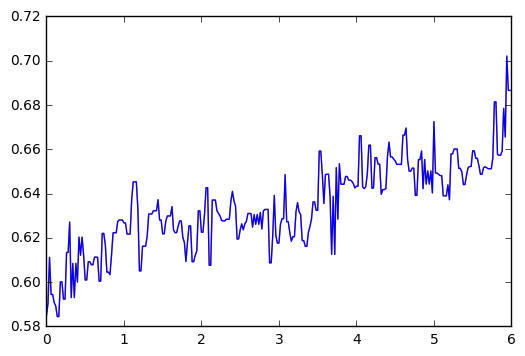

In [98]:
import numpy as np

plt.plot(multi_fly_df['t'][0:300], multi_fly_df['b2_left'][0:300], color = 'orange')
plt.plot(multi_fly_df_medfilt['t'][0:300], multi_fly_df_medfilt['b2_left'][0:300], color = 'blue')
plt.show()

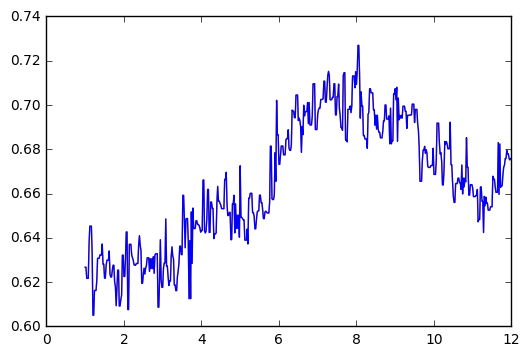

In [99]:
import numpy as np

plt.plot(multi_fly_df['t'][50:600], multi_fly_df['b2_left'][50:600], color = 'orange')
plt.plot(multi_fly_df_medfilt['t'][50:600], multi_fly_df_medfilt['b2_left'][50:600], color = 'blue')
plt.show()

In [18]:
mini_test = multi_fly_df[0:300]

In [23]:
mini_test.replace([np.inf, -np.inf], np.nan, inplace=True)
mini_test = mini_test.interpolate(method ='linear', limit_direction ='forward', limit=5)
mini_test = mini_test.fillna(0)

In [24]:
mini_test.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right,l_plus_r
0,0.000000,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,0.0
1,0.020000,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,0.0
2,0.040001,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,0.0
3,0.060001,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,0.0
4,0.080002,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,0.0


In [ ]:
#multi_fly_df = multi_fly_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#multi_fly_df_i = multi_fly_df.interpolate


In [ ]:
mutli_fly_df 

In [24]:
df = median_filter_all_columns(multi_fly_df)

In [25]:
df.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
0,0.000000,pretrial_stripe_fix,NaN,NaN,NaN,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,7.332649,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0
1,0.020000,pretrial_stripe_fix,NaN,NaN,NaN,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,7.332649,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0
2,0.040001,pretrial_stripe_fix,NaN,NaN,NaN,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,7.332649,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0
3,0.060001,pretrial_stripe_fix,NaN,NaN,NaN,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,7.332649,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0
4,0.080002,pretrial_stripe_fix,NaN,NaN,NaN,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,7.332649,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0


In [ ]:
## normalize med filtered 

In [ ]:
#normalized = normed_multi_fly_df.loc[normed_multi_fly_df['stimulus']== 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']


In [100]:
multi_fly_df.replace([np.inf, -np.inf], np.nan, inplace=True)
multi_fly_df_i = multi_fly_df.interpolate(method ='linear', limit_direction ='forward', limit=5)
multi_fly_df_i = multi_fly_df_i.fillna(0)

In [102]:
multi_fly_df_i.isnull().values.any()

False

In [29]:
multi_fly_df_i.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right,l_plus_r
0,0.000000,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,0.0
1,0.020000,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,0.0
2,0.040001,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,0.0
3,0.060001,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,0.0
4,0.080002,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,0.0


In [103]:

def normd(fly_num, muscle):
        df=multi_fly_df_i.loc[multi_fly_df_i['fly_num']==fly_num]
        a = len(df[muscle])
        m = df[muscle]
        #a_5p = a*5/100.
        #a_5pr = round(a_5p)
        #minimums_5p = arr.argsort()[:a_5pr]
        #maximums_5p = arr.argsort()[:-a_5pr]
        #minimums_5p = np.argpartition(df, a_5pr)
        print("1.5th percentile:   ", np.percentile(m, 1.5))
        muscle_min = np.percentile(m, 1.5)
        print("98.5th percentile:   ", np.percentile(m, 98.5))
        muscle_max = np.percentile(m, 98.5)

        normalized = (m-muscle_min)/(muscle_max-muscle_min)
        return normalized

In [ ]:
normed_multi_fly_df = pd.DataFrame()

for flynum in fly_nums:
    df=multi_fly_df_i.loc[multi_fly_df_i['fly_num']==flynum]
    for key in sorted_keys: 
        a = normd(df[key])
        df[key] = a
    normed_multi_fly_df = normed_multi_fly_df.append(df)

In [44]:
muscle_list = ('b1_left', 'b2_left', 'b3_left', 'i1_left', 'i2_left', 'iii1_left', 'iii3_left', 'hg1_left', 'hg2_left', 'hg3_left', 'hg4_left', 
              'b1_right', 'b2_right', 'b3_right', 'i1_right', 'i2_right', 'iii1_right', 'iii3_right', 'hg1_right', 'hg2_right', 'hg3_right', 'hg4_right')



normed_multi_fly_df = pd.DataFrame()

for flynum in fly_nums:
    df=multi_fly_df_i.loc[multi_fly_df_i['fly_num']==flynum]
    for muscle in muscle_list: 
        a = normd(df[muscle])
        df[muscle] = a
    normed_multi_fly_df = normed_multi_fly_df.append(df)

In [104]:
normed_multi_fly_df = pd.DataFrame()

for flynum in fly_nums:
    df=multi_fly_df_i.loc[multi_fly_df_i['fly_num']==flynum]
    for muscle in muscle_list: 
        a = normd(flynum, muscle)
        df[muscle] = a
    normed_multi_fly_df = normed_multi_fly_df.append(df)

('1.5th percentile:   ', 3.7626956508693756)
('98.5th percentile:   ', 4.4838839562539317)


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('1.5th percentile:   ', 0.45168094799558539)
('98.5th percentile:   ', 1.2498275539441535)
('1.5th percentile:   ', 4.6580830780443288)
('98.5th percentile:   ', 7.5294937854234663)
('1.5th percentile:   ', 2.3216986244708981)
('98.5th percentile:   ', 6.8031997360656007)
('1.5th percentile:   ', 0.0)
('98.5th percentile:   ', 1.8677090909082235)
('1.5th percentile:   ', 1.1053541181264774)
('98.5th percentile:   ', 1.954801379711935)
('1.5th percentile:   ', 2.2541760792726122)
('98.5th percentile:   ', 7.9397487443493882)
('1.5th percentile:   ', 3.4190320978636555)
('98.5th percentile:   ', 11.2345154433178)
('1.5th percentile:   ', 14.547272471284451)
('98.5th percentile:   ', 25.979825576937959)
('1.5th percentile:   ', 0.0)
('98.5th percentile:   ', 0.27750229149402622)
('1.5th percentile:   ', 0.0)
('98.5th percentile:   ', 0.28692705081666353)
('1.5th percentile:   ', 3.7382926805393919)
('98.5th percentile:   ', 4.8104804575338154)
('1.5th percentile:   ', 0.03119879052574963

In [105]:
normed_multi_fly_df.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
0,0.000000,pretrial_stripe_fix,0.223986,1.133516,0.90953,1707,227.0,condition=pretrial_closed_loop;gain=-1,3.582547,1.336457,...,0.117370,0.264926,0.032868,0.093824,64.550541,0.894658,0.687965,0.681284,0.720611,0.627308
1,0.020001,pretrial_stripe_fix,0.223986,1.133516,0.90953,1707,227.5,condition=pretrial_closed_loop;gain=-1,3.576736,1.311181,...,0.119881,0.280005,0.032868,0.093824,64.436127,0.894658,0.714922,0.681284,0.802093,0.627308
2,0.040001,pretrial_stripe_fix,0.236093,1.145623,0.90953,1707,227.5,condition=pretrial_closed_loop;gain=-1,3.568635,1.378078,...,0.117370,0.287357,0.038395,0.093824,64.417751,0.896993,0.715603,0.681284,0.905711,0.627308
3,0.060002,pretrial_stripe_fix,0.223986,1.133516,0.90953,1707,227.5,condition=pretrial_closed_loop;gain=-1,3.559858,1.349561,...,0.121466,0.293768,0.033060,0.095133,64.688720,0.893500,0.714922,0.649680,0.855599,0.679312
4,0.080003,pretrial_stripe_fix,0.223986,1.133516,0.90953,1707,227.5,condition=pretrial_closed_loop;gain=-1,3.606757,1.422741,...,0.114429,0.287357,0.038395,0.095133,64.728243,0.908500,0.715603,0.664549,0.751606,0.699848


In [50]:
normed_multi_fly_df.to_csv("normed_multi_fly_df_CL_data_for_UMAP.csv")

In [106]:
normed_multi_fly_df.to_csv("normed_multi_fly_df_OL_data_for_UMAP.csv")

In [53]:
df_i = pd.read_csv("normed_multi_fly_df_CL_data_for_UMAP.csv")

In [107]:
df_i.head()

,Unnamed: 0,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,...,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right,l_plus_r
0,0,0.000000,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,...,0.0,0.207107,0.124072,22.93889,0.005551,0.289151,0.001809,0.0,0.0,0.0
1,1,0.020000,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,...,0.0,0.207107,0.124072,22.93889,0.005551,0.289151,0.001809,0.0,0.0,0.0
2,2,0.040001,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,...,0.0,0.207107,0.124072,22.93889,0.005551,0.289151,0.001809,0.0,0.0,0.0
3,3,0.060001,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,...,0.0,0.207107,0.124072,22.93889,0.005551,0.289151,0.001809,0.0,0.0,0.0
4,4,0.080002,pretrial_stripe_fix,0.0,0.0,0.0,1389.0,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,...,0.0,0.207107,0.124072,22.93889,0.005551,0.289151,0.001809,0.0,0.0,0.0


In [108]:
df = normed_multi_fly_df

In [109]:
df['stimulus']=df['stimulus'].replace('yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0', 'yaw_left')
df['stimulus']=df['stimulus'].replace('yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0', 'yaw_right')
df['stimulus']=df['stimulus'].replace('pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0', 'pitch_up')
df['stimulus']=df['stimulus'].replace('pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0', 'pitch_down')
df['stimulus']=df['stimulus'].replace('roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0', 'roll_cw')
df['stimulus']=df['stimulus'].replace('roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0', 'roll_ccw')


In [110]:
df['fly_num']=df['fly_num'].replace(1707.0, 1)
df['fly_num']=df['fly_num'].replace(1708.0, 2)
df['fly_num']=df['fly_num'].replace(1711.0, 3)
df['fly_num']=df['fly_num'].replace(1712.0, 4)
df['fly_num']=df['fly_num'].replace(1713.0, 5)
df['fly_num']=df['fly_num'].replace(1715.0, 6)
df['fly_num']=df['fly_num'].replace(1716.0, 7)
df['fly_num']=df['fly_num'].replace(1717.0, 8)
df['fly_num']=df['fly_num'].replace(1718.0, 9)
df['fly_num']=df['fly_num'].replace(1719.0, 10)
df['fly_num']=df['fly_num'].replace(1720.0, 11)
df['fly_num']=df['fly_num'].replace(1721.0, 12)
df['fly_num']=df['fly_num'].replace(1722.0, 13)
df['fly_num']=df['fly_num'].replace(1723.0, 14)
df['fly_num']=df['fly_num'].replace(1724.0, 15)
df['fly_num']=df['fly_num'].replace(1725.0, 16)
df['fly_num']=df['fly_num'].replace(1726.0, 17)
df['fly_num']=df['fly_num'].replace(1729.0, 18)


In [111]:
tidy_df = df

In [112]:
tidy_df.to_csv("tidier_multi_fly_df.csv")

In [113]:
fly_1 = df.loc[(df['fly_num'] == 1)] #& (df['stimulus'] == 'yaw_right')]
fly_1.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
0,0.000000,pretrial_stripe_fix,0.223986,1.133516,0.90953,1,227.0,condition=pretrial_closed_loop;gain=-1,3.582547,1.336457,...,0.117370,0.264926,0.032868,0.093824,64.550541,0.894658,0.687965,0.681284,0.720611,0.627308
1,0.020001,pretrial_stripe_fix,0.223986,1.133516,0.90953,1,227.5,condition=pretrial_closed_loop;gain=-1,3.576736,1.311181,...,0.119881,0.280005,0.032868,0.093824,64.436127,0.894658,0.714922,0.681284,0.802093,0.627308
2,0.040001,pretrial_stripe_fix,0.236093,1.145623,0.90953,1,227.5,condition=pretrial_closed_loop;gain=-1,3.568635,1.378078,...,0.117370,0.287357,0.038395,0.093824,64.417751,0.896993,0.715603,0.681284,0.905711,0.627308
3,0.060002,pretrial_stripe_fix,0.223986,1.133516,0.90953,1,227.5,condition=pretrial_closed_loop;gain=-1,3.559858,1.349561,...,0.121466,0.293768,0.033060,0.095133,64.688720,0.893500,0.714922,0.649680,0.855599,0.679312
4,0.080003,pretrial_stripe_fix,0.223986,1.133516,0.90953,1,227.5,condition=pretrial_closed_loop;gain=-1,3.606757,1.422741,...,0.114429,0.287357,0.038395,0.095133,64.728243,0.908500,0.715603,0.664549,0.751606,0.699848


In [115]:
fly_1.experimental_condition.unique()

array(['condition=pretrial_closed_loop;gain=-1', 'condition=baseline',
       'condition=test'], dtype=object)

In [119]:
fly_1['experiments']= 0

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [149]:
df['experiments']=0

In [123]:
fly_1.loc[fly_1['experimental_condition'] == 'condition=test', 'experiments'] = 1

In [151]:
df.loc[df['experimental_condition'] == 'condition=test', 'experiments'] = 1

In [125]:
fly_1.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right,experiments,experiment
0,0.000000,pretrial_stripe_fix,0.223986,1.133516,0.90953,1,227.0,condition=pretrial_closed_loop;gain=-1,3.582547,1.336457,...,0.032868,0.093824,64.550541,0.894658,0.687965,0.681284,0.720611,0.627308,0,NaN
1,0.020001,pretrial_stripe_fix,0.223986,1.133516,0.90953,1,227.5,condition=pretrial_closed_loop;gain=-1,3.576736,1.311181,...,0.032868,0.093824,64.436127,0.894658,0.714922,0.681284,0.802093,0.627308,0,NaN
2,0.040001,pretrial_stripe_fix,0.236093,1.145623,0.90953,1,227.5,condition=pretrial_closed_loop;gain=-1,3.568635,1.378078,...,0.038395,0.093824,64.417751,0.896993,0.715603,0.681284,0.905711,0.627308,0,NaN
3,0.060002,pretrial_stripe_fix,0.223986,1.133516,0.90953,1,227.5,condition=pretrial_closed_loop;gain=-1,3.559858,1.349561,...,0.033060,0.095133,64.688720,0.893500,0.714922,0.649680,0.855599,0.679312,0,NaN
4,0.080003,pretrial_stripe_fix,0.223986,1.133516,0.90953,1,227.5,condition=pretrial_closed_loop;gain=-1,3.606757,1.422741,...,0.038395,0.095133,64.728243,0.908500,0.715603,0.664549,0.751606,0.699848,0,NaN


In [128]:
fly_1['deriv']= np.gradient(fly_1['experiments'])

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [152]:
df['deriv']= np.gradient(df['experiments'])

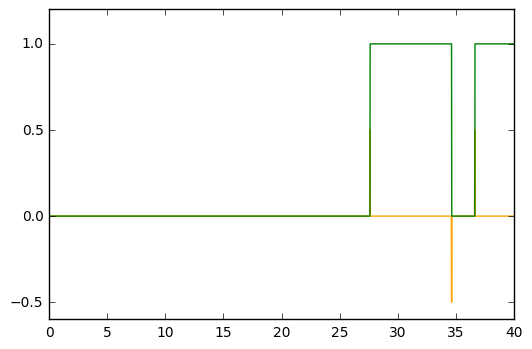

In [136]:

plt.plot(fly_1['t'][0:2000], fly_1['deriv'][0:2000], color = 'orange')
plt.plot(fly_1['t'][0:2000], fly_1['experiments'][0:2000], color = 'green')
plt.show()

In [ ]:
for data_point in trial

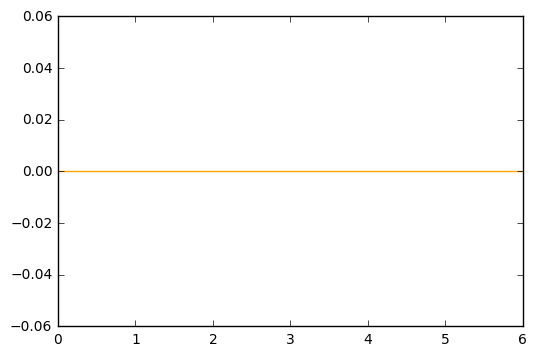

In [144]:
trial_start_inds = (fly_1.index[(fly_1['deriv'] >= 0.5)].tolist())
trial_end_inds = (fly_1.index[(fly_1['deriv'] <= 0.5)].tolist())

In [146]:
fly_1['trials']=0

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
flies = range(1,19)

In [147]:
stimuli =  ('yaw_right', 'yaw_left', 'pitch_up', 'pitch_down', 'roll_cw', 'roll_ccw')

In [156]:
giant_df_with_trials = pd.DataFrame()

for fly in flies:
    temp_fly_df = df.loc[df['fly_num'] == fly]
    for stimulus in stimuli: 
        temp_stimulus_df = temp_fly_df.loc[temp_fly_df['stimulus'] == stimulus]
        trial_start_inds = (temp_stimulus_df.index[(temp_stimulus_df['deriv'] >= 0.5)].tolist())
        trial_end_inds = (temp_stimulus_df.index[(temp_stimulus_df['deriv'] <= 0.5)].tolist())
        for ind in range(len(trial_start_inds)): 
            temp_stimulus_df['trial'] = 0
            temp_stimulus_df['trial'][trial_start_inds[ind]: trial_end_inds[ind]]= ind + 1
        
    giant_df_with_trials= giant_df_with_trials.append(temp_stimulus_df)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [157]:
giant_df_with_trials.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right,experiments,deriv,trial
3339,66.782230,roll_ccw,0.066590,1.097194,1.030603,1,225.5,condition=baseline,3.448426,1.528890,...,0.089634,66.059118,0.903800,0.764033,0.493493,0.930196,0.446633,0,-0.5,0
3340,66.802230,roll_ccw,0.054483,1.079033,1.024549,1,225.5,condition=baseline,3.533307,1.523423,...,0.092036,66.453008,0.895543,0.764033,0.493493,0.994867,0.483357,0,0.0,0
3341,66.822231,roll_ccw,0.060537,1.079033,1.018496,1,225.5,condition=baseline,3.535235,1.539740,...,0.095350,66.284541,0.885552,0.749869,0.530795,1.125231,0.528646,0,0.0,0
3342,66.842232,roll_ccw,0.060537,1.079033,1.018496,1,225.5,condition=baseline,3.509745,1.587729,...,0.095350,66.075696,0.879554,0.749869,0.533700,0.998146,0.528646,0,0.0,0
3343,66.862232,roll_ccw,0.054483,1.085086,1.030603,1,225.5,condition=baseline,3.479375,1.477959,...,0.095350,66.302254,0.879554,0.749869,0.535923,1.263476,0.461914,0,0.0,0


fly_1["trial"] = fly_1["experiments"].shift(1, fill_value=fly_1["experiments"].head(1)) != fly_1["experiments"]
fly_1

In [ ]:
df.loc[df['experimental_condition'] == 'condition=test', 'experiment'] = 1

for timeframe in range(len(df)):
    if df['experimental_condition'] == 'condition=test':
        df['experiment'] = 1
    else:
        df['experiment'] = 0

In [ ]:
 import pandas as pd
>>> df = pd.DataFrame({"Status": ["A","A","B","B","C","C","C"]})
>>> df["isStatusChanged"] = df["Status"].shift(1, fill_value=df["Status"].head(1)) != df["Status"]
>>> df